# Segmenting and Clustering Neighborhoods in Toronto

### Importing the needed Libraries and tools

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import wikipedia

print('Libraries imported.')

Libraries imported.


# Scripping Data from the Web

In [2]:
print(wikipedia.summary("List of postal codes of Canada: M"))

This is a list of postal codes in Canada where the first letter is M. Postal codes beginning with M are located within the city of Toronto in the province of Ontario. Only the first three characters are listed, corresponding to the Forward Sortation Area.
Canada Post provides a free postal code look-up tool on its website, via its applications for such smartphones as the iPhone and BlackBerry,  and sells hard-copy directories and CD-ROMs. Many vendors also sell validation tools, which allow customers to properly match addresses and postal codes. Hard-copy directories can also be consulted in all post offices, and some libraries.


In [3]:
# for Using wikipedia library
#ny = wikipedia.page("List of postal codes of Canada: M")
#ny.title
#ny.url
#ny.content
#ny.links[0]

In [5]:
# Moving to the directory of the data on your system
%cd documents

C:\Users\omar9\documents


In [6]:
#Neighborhoods_in_Toronto.xlsx : The excel file that have our data
Toronto = pd.read_excel("Neighborhoods_in_Toronto.xlsx")
Toronto.head()

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M1B,Scarborough,Rouge
2,M1B,Scarborough,Malvern
3,M1C,Scarborough,Highland Creek
4,M1C,Scarborough,Rouge Hill


# Question 1 - Processing the Dataframe

* Dataframe consists of: Postcode , Borough, Neighbourhood
* Removing Not assigned borough
* Merging repeated borough
* Not assigned neighbouhoods is changed to the same name of its borough
* Use .shape

In [7]:
Toronto = Toronto[Toronto.Borough != 'Not assigned']
Toronto.Neighborhood[Toronto.Neighborhood == 'Not assigned'] = Toronto.Borough[Toronto.Neighborhood == 'Not assigned']

In [8]:
Toronto.Neighborhood[Toronto.Neighborhood == 'Not assigned'] = Toronto.Borough[Toronto.Neighborhood == 'Not assigned']

In [9]:
Toronto = Toronto.groupby(['Postcode','Borough'],as_index=False,sort=False).agg(lambda x: ', '.join(x))

In [10]:
Toronto.head()

,Postcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [11]:
Toronto.shape

(103, 3)

# Question 2 - Adding the Latitude, Longitude of the Neighbourhood

### unfortunately, the Geocoder package didn't work with me, so I used the .csv file directly

In [12]:
geo = pd.read_csv('Geospatial_Coordinates.csv')
geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Retrieving the coordinates from the .csv file and then add it to the dataframe

In [13]:
Toronto['Latitude'] = geo.Latitude
Toronto['Longitude'] = geo.Longitude
Toronto.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


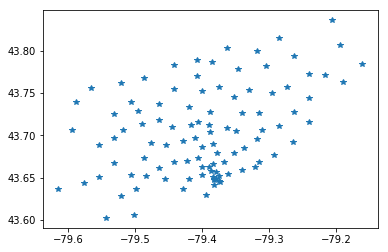

In [14]:
#Toronto_p[['Latitude',	'Longitude']].plot(kind = "line")
y = np.array(Toronto.Latitude)
x = np.array(Toronto.Longitude)

plt.plot(x,y,'*')

# Question 3 - K-Means Clustring

In [15]:
#from sklearn.preprocessing import StandardScaler

#################################
# drop the unwanted columns


#################################


#X = df.values[:,1:]
#X = np.nan_to_num(X)
#cluster_dataset = StandardScaler().fit_transform(X)
#cluster_dataset



################################

#num_clusters = 3

#k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
#k_means.fit(cluster_dataset)
#labels = k_means.labels_

#print(labels)

################################

#df["Labels"] = labels
#df.head(5)

################################

#df.groupby('Labels').mean()

In [16]:
CLIENT_ID = 'G253PXG12IIBGKJORQ10VS3DZ3CI4XHNWMVELQYL4F0RLAAL' # your Foursquare ID
CLIENT_SECRET = 'ANVOUGNXBEDHLQ1WESVHUYD1GAL3OJMHEW5Q1UMMHNAEXBO0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: G253PXG12IIBGKJORQ10VS3DZ3CI4XHNWMVELQYL4F0RLAAL
CLIENT_SECRET:ANVOUGNXBEDHLQ1WESVHUYD1GAL3OJMHEW5Q1UMMHNAEXBO0


In [17]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

GeocoderTimedOut: Service timed out

In [ ]:
neighborhood_latitude = Toronto.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Toronto.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = Toronto.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

In [ ]:
# type your answer here
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

url

In [ ]:
results = requests.get(url).json()
results

In [ ]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

In [ ]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

## 2. Explore Neighborhoods in Manhattan

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
Toronto_venues = getNearbyVenues(names=Toronto['Neighborhood'],
                                   latitudes=Toronto['Latitude'],
                                   longitudes=Toronto['Longitude']
                                  )

In [ ]:
print(Toronto_venues.shape)
Toronto_venues.head()

In [ ]:
Toronto_venues.groupby('Neighborhood').count()

In [ ]:
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

## 3. Analyze Each Neighborhood

In [ ]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

In [ ]:
Toronto_onehot.shape

In [ ]:
Toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
Toronto_grouped

In [ ]:
Toronto_grouped.shape

In [ ]:
# Let's print each neighborhood along with the top 5 most common venues

num_top_venues = 5

for hood in Toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Toronto_grouped['Neighborhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

## 4. Cluster Neighborhoods

In [ ]:
# set number of clusters
kclusters = 5

Toronto_grouped_clustering = Toronto_grouped.drop('Neighborhood',axis=1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

In [ ]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Toronto_merged = Toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Toronto_merged = Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
Toronto_merged.dropna(subset=["Cluster Labels"],axis=0,inplace=True)

Toronto_merged # check the last columns!

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Latitude'], Toronto_merged['Longitude'], Toronto_merged['Neighborhood'], Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters

### Cluster 1

In [ ]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 0, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

### Cluster 2

In [ ]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

### Cluster 3

In [ ]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 2, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

### Cluster 4

In [ ]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 3, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

### Cluster 5

In [ ]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 4, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]